In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
#downloading the dataset and saving them in a temporary directory.

--2020-11-16 06:05:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.126, 2600:1417:76:586::e59, 2600:1417:76:58e::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   133MB/s    in 5.9s    

2020-11-16 06:05:08 (133 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
#printing out the length of the individual directories.

12501
12501


In [4]:

# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
to_create = [
    '/tmp/cats-v-dogs',
    '/tmp/cats-v-dogs/training',
    '/tmp/cats-v-dogs/testing',
    '/tmp/cats-v-dogs/training/cats',
    '/tmp/cats-v-dogs/training/dogs',
    '/tmp/cats-v-dogs/testing/cats',
    '/tmp/cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/tmp/cats-v-dogs created
/tmp/cats-v-dogs/training created
/tmp/cats-v-dogs/testing created
/tmp/cats-v-dogs/training/cats created
/tmp/cats-v-dogs/training/dogs created
/tmp/cats-v-dogs/testing/cats created
/tmp/cats-v-dogs/testing/dogs created


In [ ]:
def callbacks:
  

In [5]:
def split_data(SOURCE,TRAINING,TESTING,Split_size):
  all_files=[]
  for file_name in os.listdir(SOURCE):
    file_path= SOURCE + file_name

    if os.path.getsize(file_path):
      all_files.append(file_name)
      
    else:
      print('{} is of zero size, so ignoring'.format(file_name))

  n_files=len(all_files)
  split_point=int(n_files*Split_size)

  shuffled= random.sample(all_files,n_files)
  train_set=shuffled[:split_point]
  test_set=shuffled[split_point:]

  for file_name in train_set:
    copyfile(SOURCE + file_name,TRAINING + file_name)
  for file_name in test_set:
    copyfile(SOURCE + file_name,TESTING + file_name)


In [6]:
CAT_SOURCE= "/tmp/PetImages/Cat/"
CAT_TRAIN_DIR="/tmp/cats-v-dogs/training/cats/"
CAT_TEST_DIR="/tmp/cats-v-dogs/testing/cats/"
DOG_TRAIN_DIR="/tmp/cats-v-dogs/training/dogs/"
DOG_SOURCE ="/tmp/PetImages/Dog/"
DOG_TEST_DIR="/tmp/cats-v-dogs/testing/dogs/"
split_size=0.9
split_data(CAT_SOURCE,CAT_TRAIN_DIR,CAT_TEST_DIR,split_size)
split_data(DOG_SOURCE,DOG_TRAIN_DIR,DOG_TEST_DIR,split_size)

666.jpg is of zero size, so ignoring
11702.jpg is of zero size, so ignoring


In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))


11250
11250
1250
1250


In [14]:
model=tf.keras.Sequential([
       tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),
       #tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
       #tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512,activation='relu'),
       #tf.keras.layers.Dense(128,activation='relu'),
       tf.keras.layers.Dense(1,activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
TRAINING_DIR='/tmp/cats-v-dogs/training'
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
)
train_generator=train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=100,
       class_mode='binary',
    target_size=(150,150)
)



Found 22498 images belonging to 2 classes.


In [18]:
VALID_DIR='/tmp/cats-v-dogs/testing'
valid_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_generator=valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(150,150),
    batch_size=100,
    class_mode='binary'
)

Found 2500 images belonging to 2 classes.


In [19]:
history=model.fit_generator(
    train_generator,
    epochs=15,
    #steps_per_epoch=8,
    verbose=1,
    validation_data=valid_generator)

    

Epoch 1/15
 11/225 [>.............................] - ETA: 2:15 - loss: 2.8917 - accuracy: 0.4927

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 175s 777ms/step - loss: 0.7867 - accuracy: 0.5883 - val_loss: 0.6695 - val_accuracy: 0.5796
Epoch 2/15
225/225 [==============================] - 173s 769ms/step - loss: 0.6157 - accuracy: 0.6598 - val_loss: 0.5613 - val_accuracy: 0.7184
Epoch 3/15
225/225 [==============================] - 173s 768ms/step - loss: 0.5709 - accuracy: 0.7045 - val_loss: 0.5347 - val_accuracy: 0.7352
Epoch 4/15
225/225 [==============================] - 172s 765ms/step - loss: 0.5491 - accuracy: 0.7210 - val_loss: 0.5449 - val_accuracy: 0.7280
Epoch 5/15
225/225 [==============================] - 172s 763ms/step - loss: 0.5305 - accuracy: 0.7385 - val_loss: 0.5175 - val_accuracy: 0.7448
Epoch 6/15
225/225 [==============================] - 172s 763ms/step - loss: 0.5185 - accuracy: 0.7460 - val_loss: 0.5192 - val_accuracy: 0.7448
Epoch 7/15
225/225 [==============================] - 170s 757ms/step - loss: 0.5024 - accuracy: 0.7543 - val_loss: 0.4696 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

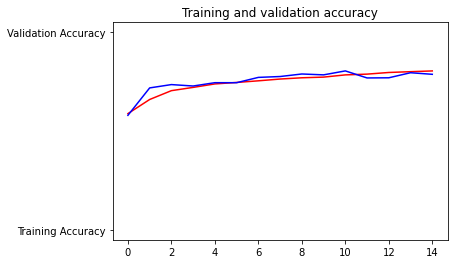

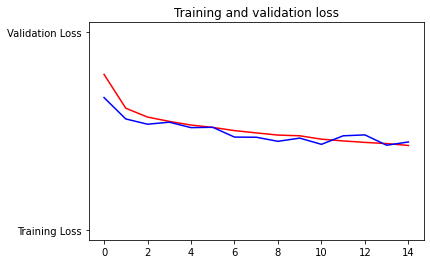

In [20]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
#-----------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :),happy coding!!!!!

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving bed-1284238_1920.jpg to bed-1284238_1920 (1).jpg
[4.8534635e-06]
bed-1284238_1920.jpg is a cat
